In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2
from skimage.transform import rescale, resize

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")




class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
class MaskPeople(object):
    def __init__(self):
        config = InferenceConfig()
#         config.display()
        
        # Create model object in inference mode.
        self.model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

        # Load weights trained on MS-COCO
        self.model.load_weights(COCO_MODEL_PATH, by_name=True)
    
    def detect_all(self, data):
        results = self.model.detect([data], verbose=1)
        r = results[0]
        return r
    
    def detect_people(self, data, height, width):
        results = self.model.detect([data], verbose=1)
        r = results[0]
        people_list = []
        for i in range(len(r['class_ids'])):
            if r['class_ids'][i] != 1:
                continue
            people_list.append(r['rois'][i])
        people_rois = []
        for i in people_list:
            x1, y1, x2, y2 = i
            people_rois.append(resize(image[x1:x2,y1:y2], (height, width), anti_aliasing=False))
        return people_rois
        
    def visual(self,r):
        visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])
        
        
        
        

Using TensorFlow backend.


Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


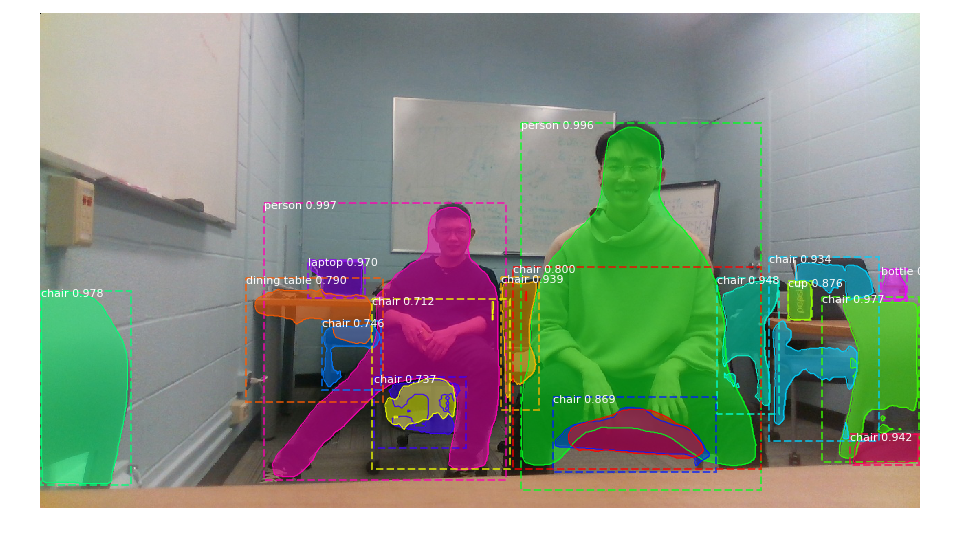

In [2]:
image = skimage.io.imread(os.path.join(IMAGE_DIR, "demo_presentation.jpg"))

# Run detection
mask_people = MaskPeople()
results = mask_people.detect_all(image)
# Visualize results
mask_people.visual(results)

In [2]:
mask_people = MaskPeople()
image = skimage.io.imread(os.path.join(IMAGE_DIR, "demo_presentation.jpg"))

r = mask_people.detect_people(image,71,71)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  149.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/home/xipeng/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
r = results[0]

KeyError: 0

In [ ]:
x1, y1, x2, y2 = r['rois'][0]

In [ ]:
iimage = image[x1:x2,y1:y2]

In [ ]:
iimage.shape


In [ ]:
plt.imshow(iimage)

In [ ]:
plt.imshow(image)

In [ ]:
x = np.array([[ [0,0],  [1,1],  [2,2]],
...            [ [0,3],  [1,4],  [2,5]],
...            [ [0,6],  [1,7],  [2,8]],
...            [ [0,9],  [1,10],  [2,11]]])
a = np.ndarray(x)

In [ ]:
a = nd[1:3]

In [ ]:
x = np.array([[ 0,  1,  2],
...            [ 3,  4,  5],
...            [ 6,  7,  8],
...            [ 9, 10, 11]])

In [ ]:
a.shape



In [ ]:
x = np.array([[ [0,0],  [1,1],  [2,2]],
...            [ [0,3],  [1,4],  [2,5]],
...            [ [0,6],  [1,7],  [2,8]],
...            [ [0,9],  [1,10],  [2,11]]])

In [ ]:
r['rois']

In [ ]:
r = results[0]
people_list = []
for i in range(len(r['class_ids'])):
    if r['class_ids'][i] != 1:
        continue
    people_list.append(r['rois'][i])
people_rois = []
for i in people_list:
    x1, y1, x2, y2 = i
    people_rois.append(resize(image[x1:x2,y1:y2], (100, 200),
                       anti_aliasing=False))
    

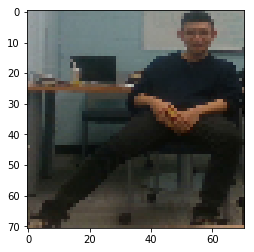

In [6]:
plt.imshow(r[0])



In [ ]:
from skimage.transform import rescale, resize
image_resized = resize(people_rois[1], (100, 100),
                       anti_aliasing=False)

In [ ]:
image_resized.shape